# Data Storytelling for Kickstarter Projects

This notebook goes beyond routine data exploration to point out the most interesting insights discovered through the [kickstarter dataset](https://www.kaggle.com/ukveteran/kickstarter). For this section, I use a cleaned set of data generated from the data wrangling and exploration notebook.

## The Story

Our communities are full of people with great ideas. However, it often takes money to help bring those ideas to life. That's where Kickstarter comes in! Through the platform, artists, builders, and other creatives can turn to online audiences for support to materialize their ideas.

But not every project on Kickstarter meets its funding goal. My larger project involves building a model to predict successful Kickstarter projects. In this particular section, we will specifically examine Kickstarter project trends to dig out correlations and insights about Kickstarter projects between 2009 and 2018. We can use these insights to uncover why some Kickstarter projects are successful when other are not.

### Ask the following questions and look for the answers using code and plots:

- Can you count something interesting?
- Can you find trends (e.g. high, low, increasing, decreasing, anomalies)?
- Can you make a bar plot or a histogram?
- Can you compare two related quantities?
- Can you make a scatterplot?
- Can you make a time-series plot?

In [1]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
from scipy.stats import pearsonr
from datetime import datetime
%matplotlib inline
print('Done!')

Done!


In [2]:
#read in csv of cleaned data
df = pd.read_csv('kickstarterClean.csv')
df.head()

,Unnamed: 0,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,duration,rate
0,0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 00:00:00,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95,58,0
1,1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01 00:00:00,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00,59,0
2,2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:00:00,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00,44,0
3,3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 00:00:00,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00,29,0
4,4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 00:00:00,19500.0,2015-07-04 08:35:03,1283.0,failed,14,US,1283.0,1283.0,19500.00,55,0


#### Can you count something interesting?

Why don't we examine the popularity of project types based on their value counts?

failed        238208
successful    133851
Name: state, dtype: int64

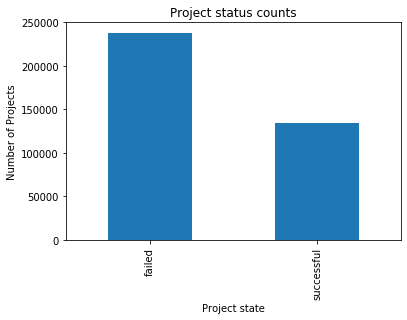

In [3]:
# how many projects were successful?
state = df.state.value_counts().plot(kind='bar')
state.set_title('Project status counts')
state.set_xlabel("Project state")
state.set_ylabel("Number of Projects")

df.state.value_counts()

Film & Video    62363
Music           49248
Publishing      39079
Games           34939
Technology      32185
Design          29761
Art             27958
Food            24416
Fashion         22562
Theater         10870
Comics          10743
Photography     10730
Crafts           8733
Journalism       4723
Dance            3749
Name: main_category, dtype: int64

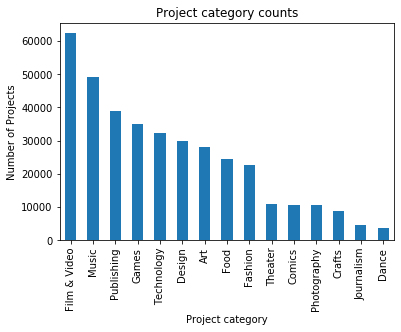

In [4]:
# overall value counts of project types

category = df.main_category.value_counts().plot(kind='bar')
category.set_title('Project category counts')
category.set_xlabel("Project category")
category.set_ylabel("Number of Projects")

df.main_category.value_counts()

Film & Video    16.761589
Music           13.236610
Publishing      10.503442
Games            9.390715
Technology       8.650510
Design           7.999000
Art              7.514400
Food             6.562400
Fashion          6.064092
Theater          2.921580
Comics           2.887445
Photography      2.883951
Crafts           2.347208
Journalism       1.269422
Dance            1.007636
Name: main_category, dtype: float64

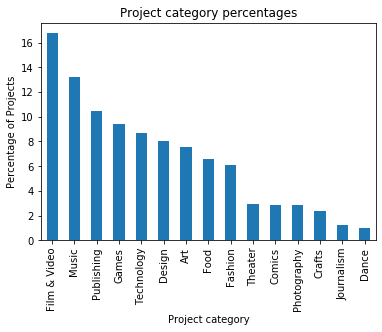

In [5]:
#let's check these as percentages

percent = (df.main_category.value_counts()/len(df) * 100).plot(kind='bar')
percent.set_title('Project category percentages')
percent.set_xlabel("Project category")
percent.set_ylabel("Percentage of Projects")

df.main_category.value_counts()/len(df) * 100

Music           18.008831
Film & Video    17.640511
Games            9.352190
Publishing       9.189322
Art              8.599114
Design           7.881151
Theater          4.881547
Technology       4.806090
Food             4.546100
Comics           4.364555
Fashion          4.178527
Photography      2.469163
Dance            1.746718
Crafts           1.580115
Journalism       0.756065
Name: main_category, dtype: float64

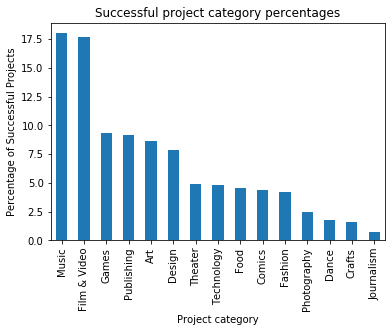

In [6]:
#I wonder if these percentages change for successful projects vs. unsuccessful ones?

#percentages of categories among successful projects

success_percent = (df['main_category'].loc[df.rate == 1].value_counts()/len(df['main_category'].loc[df.rate == 1]) * 100).plot(kind='bar')
success_percent.set_title('Successful project category percentages')
success_percent.set_xlabel("Project category")
success_percent.set_ylabel("Percentage of Successful Projects")

df['main_category'].loc[df.rate == 1].value_counts()/len(df['main_category'].loc[df.rate == 1]) * 100

Film & Video    16.267716
Publishing      11.241856
Technology      10.810720
Music           10.555061
Games            9.412362
Design           8.065220
Food             7.695375
Fashion          7.123606
Art              6.904890
Photography      3.117024
Crafts           2.778244
Comics           2.057446
Theater          1.820258
Journalism       1.557882
Dance            0.592339
Name: main_category, dtype: float64

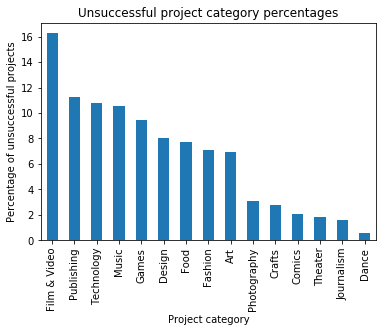

In [7]:
# percentages of categories among unsuccessful projects
failed_percent = (df['main_category'].loc[df.rate == 0].value_counts()/len(df['main_category'].loc[df.rate == 0]) * 100).plot(kind='bar')
failed_percent.set_title('Unsuccessful project category percentages')
failed_percent.set_xlabel("Project category")
failed_percent.set_ylabel("Percentage of unsuccessful projects")

df['main_category'].loc[df.rate == 0].value_counts()/len(df['main_category'].loc[df.rate == 0]) * 100

##### Summary: 

Almost 17% of all Kickstarter projects are in the Film & Video category, making it the most popular of all categories. This distribution was is rather similar among both failed and successful populations.

#### Can you find trends (e.g. high, low, increasing, decreasing, anomalies)? Can you make a bar plot or a histogram?

Here I will look at success as it relates to funding and time. I will try to answer the following two questions:

- Is it harder for more expensive projects to meet their goals?
- Do longer projects give more people more time to contribute?

,goal,pledged,backers
state,,,
failed,71319.238230,1698.514709,18.675939
successful,10166.109761,24094.387965,264.128397


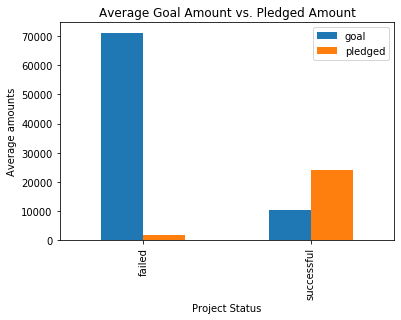

In [8]:
#Is it harder for more expensive projects to meet their goals? Let's look at the average goals and average amounts 
#pledged for both successful and unsuccessful projects.

state = df.groupby('state')[['goal', 'pledged']].mean().plot(kind='bar', title='Average Goal Amount vs. Pledged Amount')
state.set_xlabel("Project Status")
state.set_ylabel("Average amounts")

df.groupby('state')[['goal', 'pledged', 'backers']].mean()


In [9]:
# Do backers give more money on average per person to successful or failed projects?

# Average amount per backer for successful projects
df['pledged'].loc[df.rate == 1].mean()/df['backers'].loc[df.rate == 1].mean()

91.22225509923426

In [10]:
# Average amount per backer for unsuccessful projects
df['pledged'].loc[df.rate == 0].mean()/df['backers'].loc[df.rate == 0].mean()

90.94668486350595

state
failed        34.309293
successful    31.156741
Name: duration, dtype: float64

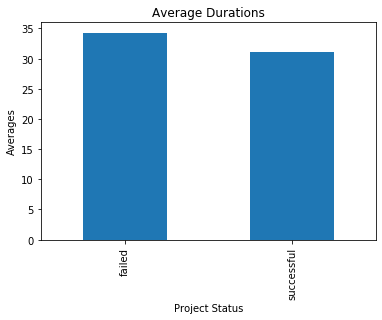

In [11]:
#Do successful projects last longer? 

#most successful goal/durations pledged/durations, least successful.

duration = df.groupby('state')['duration'].mean().plot(kind='bar', title='Average Durations')
duration.set_xlabel("Project Status")
duration.set_ylabel("Averages")

df.groupby('state')['duration'].mean()

In [12]:
#Do more people contribute over a longer duration?

#Average backers per day for successful projects
df['backers'].loc[df.rate == 1].mean()/df['duration'].loc[df.rate == 1].mean()

8.47740759133322

In [13]:
#Average backers per day for unsuccessful projects
df['backers'].loc[df.rate == 0].mean()/df['duration'].loc[df.rate == 0].mean()

0.5443405327069916

##### Summary:

It seems that projects that ask for less money in general are more likely to meet the goal amount, and more people contribute to projects that ask less on average. However, the amount individuals tend to contribute, on average, is very similar, with less than a dollar difference between the two means. Failed projects lasted on average 3 days longer than successful ones. Successful projects saw roughly eight contributers per day, whereas unsuccessful ones saw on average one backer every two days. 

#### Can you compare two related quantities?

Averages are one thing, but we should also look at the totals. After all, there were almost twice as many failed projects as there were successful ones.

,goal,pledged,backers
state,,,
failed,1.698881e+10,4.045998e+08,4448758
successful,1.360744e+09,3.225058e+09,35353850


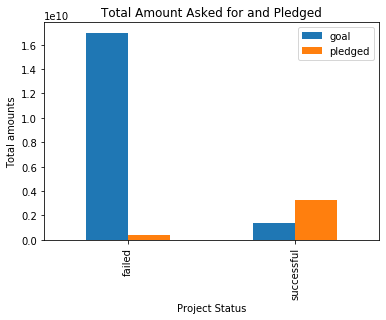

In [14]:
#pledged amount vs. goal totals

total = df.groupby('state')[['goal', 'pledged']].sum().plot(kind='bar', title='Total Amount Asked for and Pledged')
total.set_xlabel("Project Status")
total.set_ylabel("Total amounts")

df.groupby('state')[['goal', 'pledged', 'backers']].sum()


In [15]:
#Let's check average amount pledged per backer again based on these values.

# Average amount per backer for successful projects
df['pledged'].loc[df.rate == 1].sum()/df['backers'].loc[df.rate == 1].sum()

91.22225509923247

In [16]:
# Average amount per backer for unsuccessful projects
df['pledged'].loc[df.rate == 0].sum()/df['backers'].loc[df.rate == 0].sum()

#It's the same! But at least we have double checked

90.94668486350571

#### Can you make a scatterplot?

Let's look at backers and project duration more closely, this time examining all of the data individually, not just as averages.

Text(0, 0.5, 'Number of successful projects')

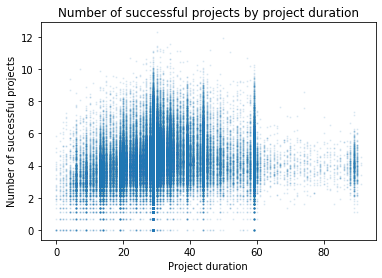

In [17]:
# number of backers vs. duration for successful projects
plt.scatter(df['duration'].loc[df.rate == 1], np.log(df['backers'].loc[df.rate == 1]), alpha=0.1, s=1)
plt.title("Number of successful projects by project duration")
plt.xlabel("Project duration")
plt.ylabel("Number of successful projects")

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0, 0.5, 'Number of unsuccessful projects')

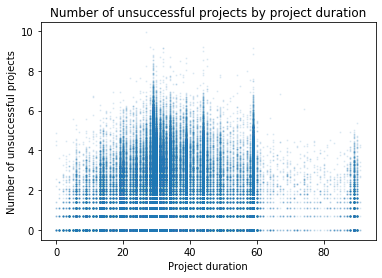

In [18]:
# number of backers vs. duration for unsuccessful projects
plt.scatter(df['duration'].loc[df.rate == 0], np.log(df['backers'].loc[df.rate == 0]), alpha=0.1, s=1)
plt.title("Number of unsuccessful projects by project duration")
plt.xlabel("Project duration")
plt.ylabel("Number of unsuccessful projects")

In [19]:
#It might be a good idea to check Pearson's Correlation coefficient for these.

#Pearson's correlation for successful projects, returns Pearson's CC and p-value
pearsonr(df['duration'].loc[df.rate == 1], df['backers'].loc[df.rate == 1])

(0.02496184406221721, 6.614140388908156e-20)

In [20]:
#Pearson's correlation for unsuccessful projects, returns Pearson's CC and p-value
pearsonr(df['duration'].loc[df.rate == 0], df['backers'].loc[df.rate == 0])

(0.00020327710231694715, 0.9209699194187295)

In [21]:
#np.polyfit(df['duration'].loc[df.rate == 1], df['backers'].loc[df.rate == 1], deg=2)

In [22]:
#np.polyfit(df['duration'].loc[df.rate == 0], df['backers'].loc[df.rate == 0], deg=2)

##### Summary:

Looking at these scatter plots, we see that, for both successful and unsuccessful projects, both a greater number of projects and projects that attract more backers tend to have durations between 20-60 days, roughly 1-2 months. Projects that are too short and too long appear to fall short. The scatterplots appear to show little correlation, and upon calculating Pearson's Correlation Coefficient, can confirm this: the weak positive correlation for both is so weak that it should in fact be interpreted as no correlation, despite the successful projects having a coefficient roughly 100 times greater than the unsuccessful ones. 

#### Can you make a time-series plot?

Let's see how support and engagement with Kickstarter and Kickstarter projects has developed over time by looking at how many people back projects.

Text(0, 0.5, 'Number of project backers')

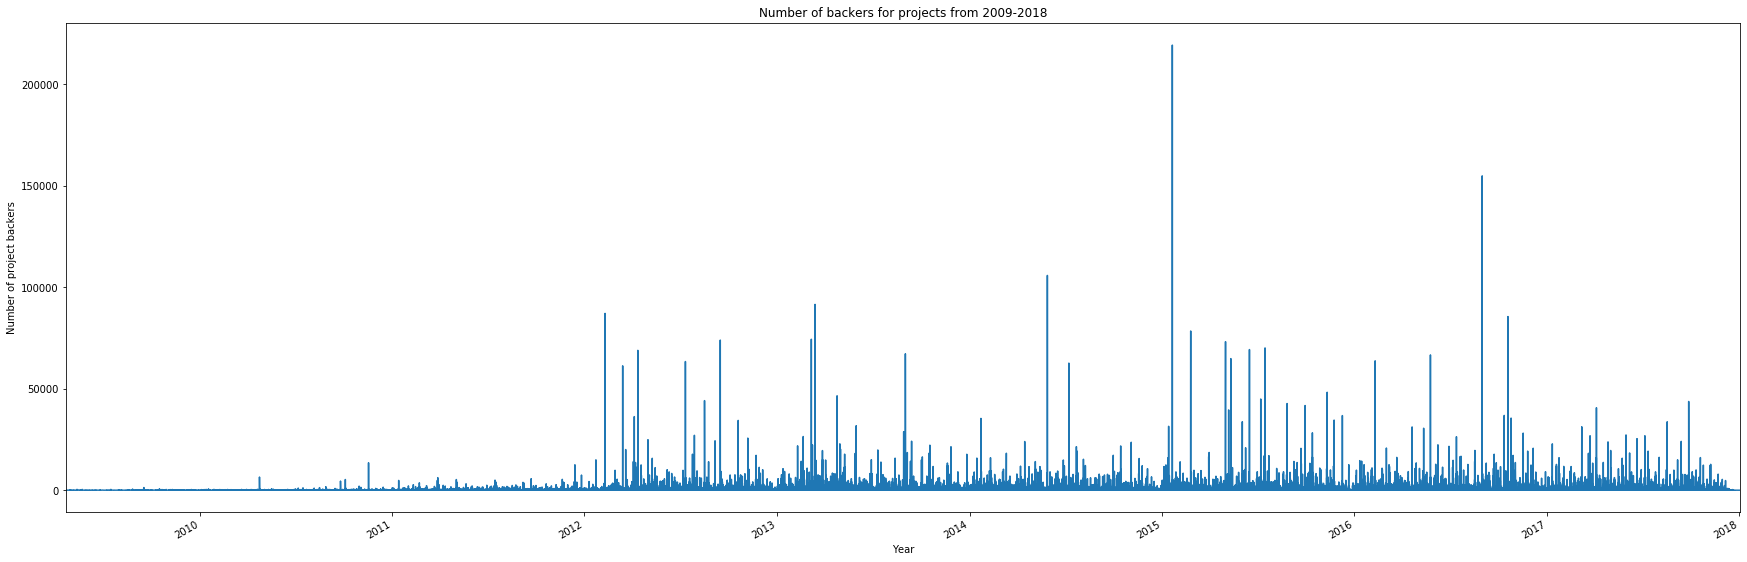

In [23]:
#times series backers over time

#set indexes to a datetime col
df.launched = pd.to_datetime(df.launched)
time = df.set_index('launched')
time_sorted = time.sort_index()
#time_sorted.head()
backers_timeseries = time_sorted['backers'].plot(figsize=(30,10))
backers_timeseries.set_title('Number of backers for projects from 2009-2018')
backers_timeseries.set_xlabel("Year")
backers_timeseries.set_ylabel("Number of project backers")



This is confusing! So let's look at it as monthly means instead.

Text(0, 0.5, 'Average number of project backers')

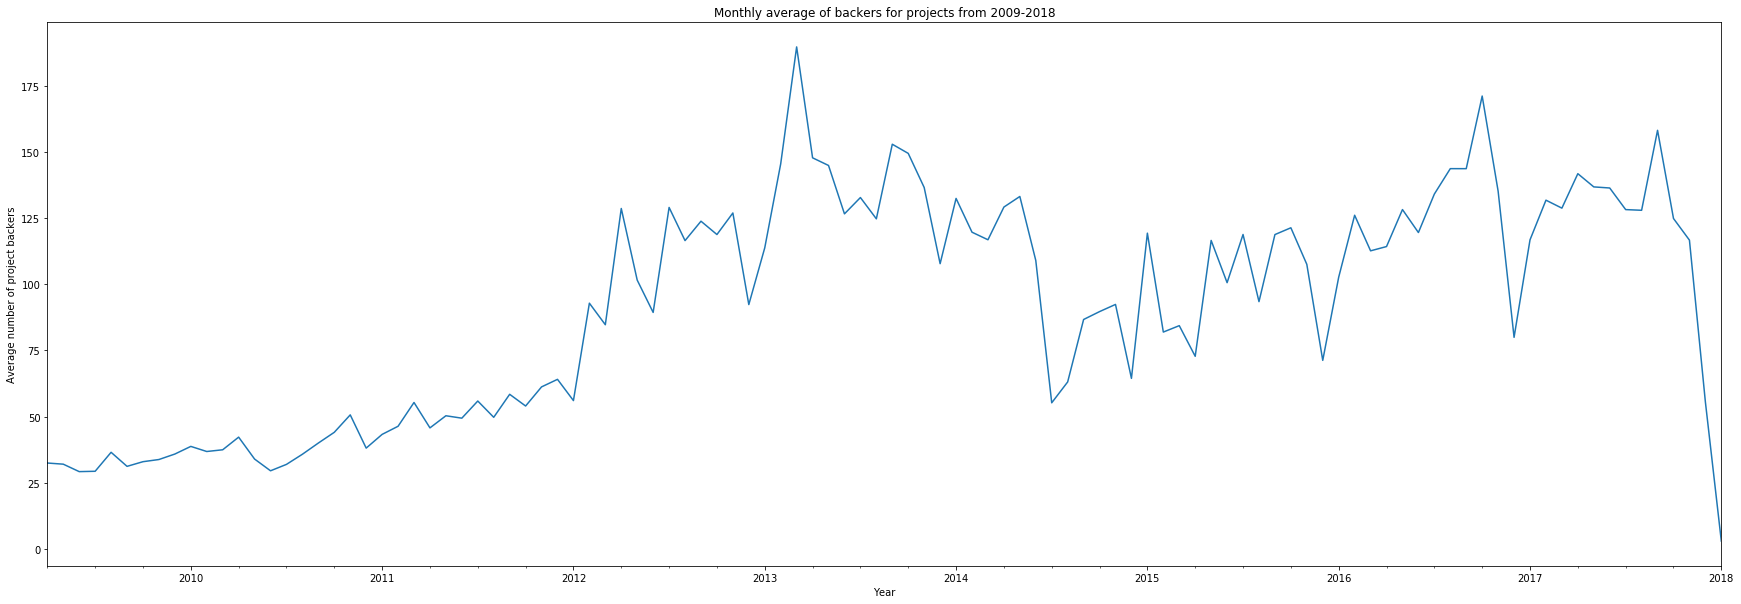

In [24]:
#plot of monthly average number of backers.
monthly_average = time_sorted['backers'].resample('M').mean().plot(figsize=(30,10))
monthly_average.set_title('Monthly average of backers for projects from 2009-2018')
monthly_average.set_xlabel("Year")
monthly_average.set_ylabel("Average number of project backers")

Text(0, 0.5, 'Average number of project backers')

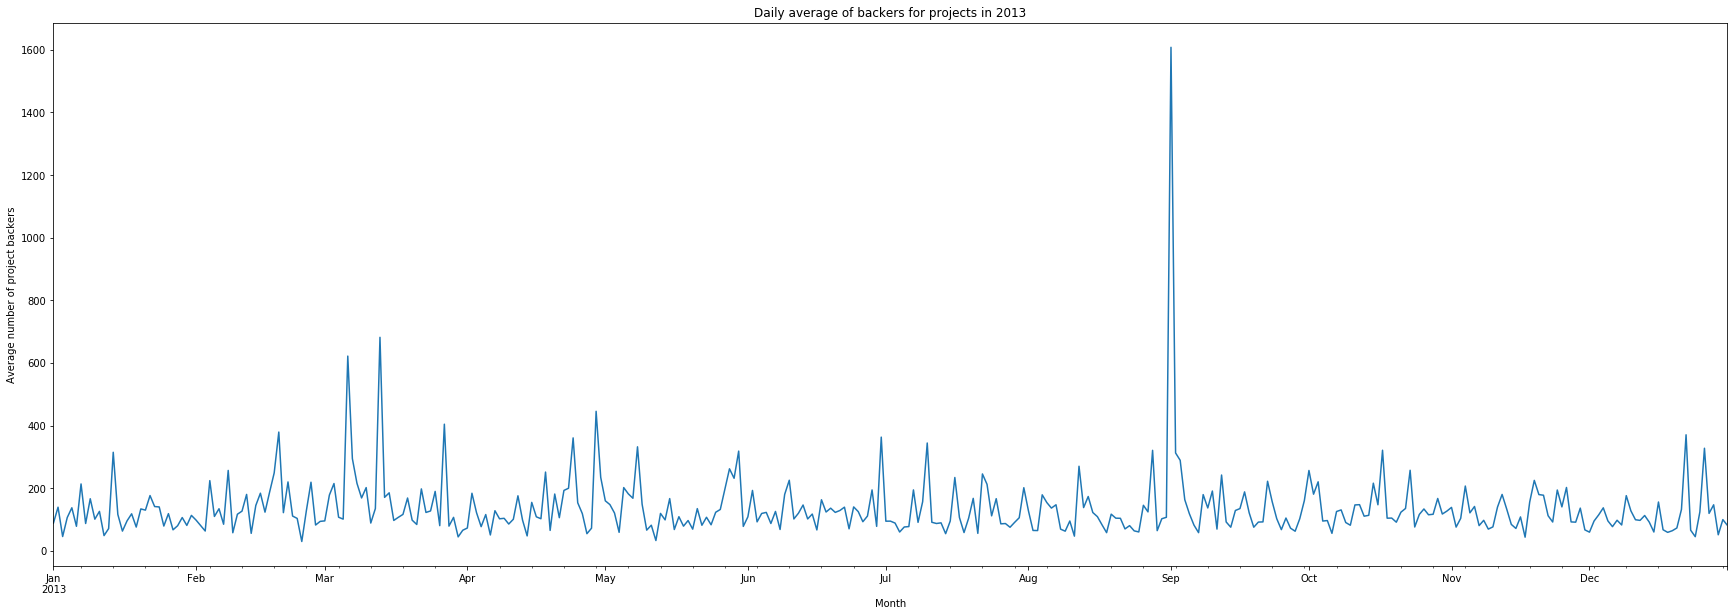

In [25]:
# Now let's narrow it down to just one year. I'll pick 2013. And we will take averages by day instead.

daily_average = time_sorted.loc['2013-01':'2013-12', 'backers'].resample('D').mean().plot(figsize=(30,10))
daily_average.set_title('Daily average of backers for projects in 2013')
daily_average.set_xlabel("Month")
daily_average.set_ylabel("Average number of project backers")

Text(0, 0.5, 'Average number of project backers')

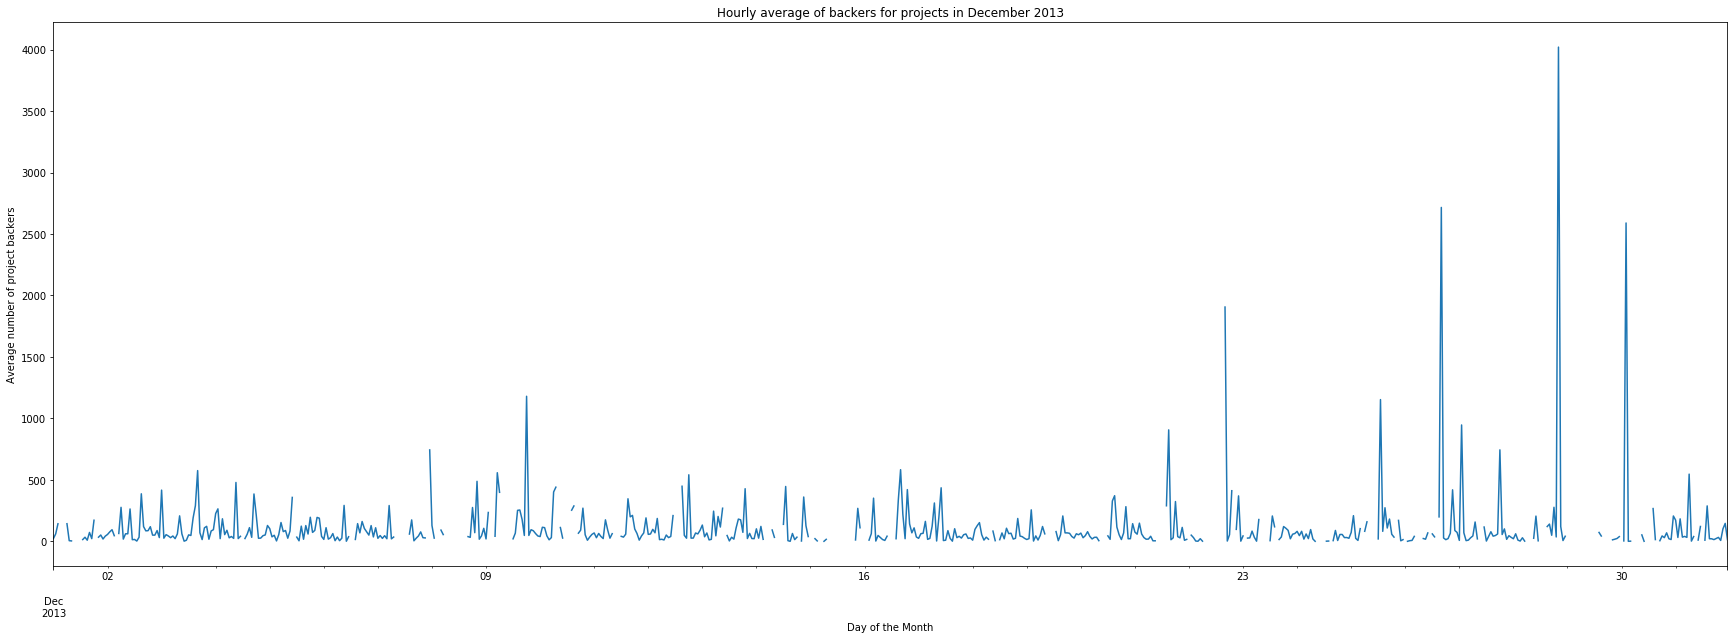

In [26]:
#And now just December, viewed by hour

hourly_average = time_sorted.loc['2013-12-01':'2013-12-31', 'backers'].resample('H').mean().plot(figsize=(30,10))
hourly_average.set_title('Hourly average of backers for projects in December 2013')
hourly_average.set_xlabel("Day of the Month")
hourly_average.set_ylabel("Average number of project backers")

#Christmas spike!  And we see whitespace for 0

Text(0, 0.5, 'Number of project backers')

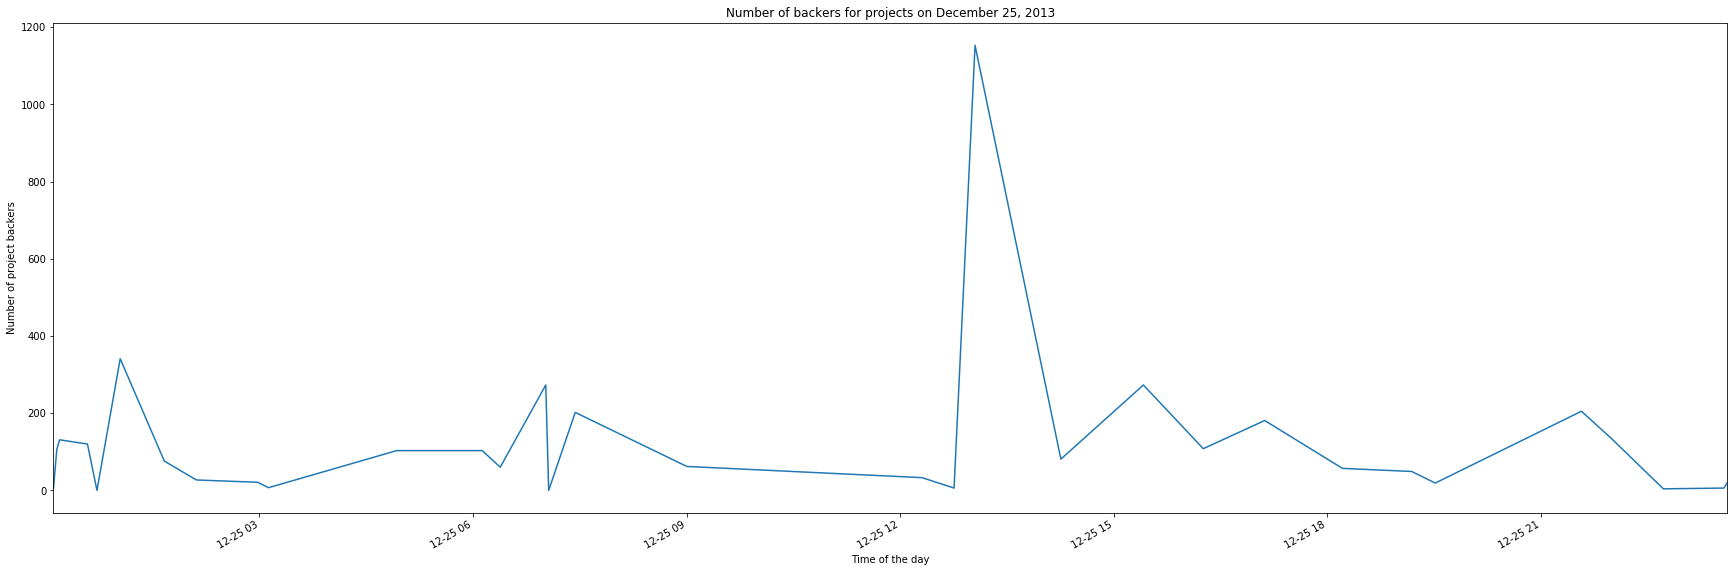

In [27]:
#And now just Dec 25. Since this is already narrowed down, we can look at the actual numbers instead of the means.
xmas = time_sorted.loc['2013-12-25 00:00:00':'2013-12-25 23:59:59', 'backers'].plot(figsize=(30,10))
xmas.set_title('Number of backers for projects on December 25, 2013')
xmas.set_xlabel("Time of the day")
xmas.set_ylabel("Number of project backers")

Now it looks like a time series graph! And we see that people are very generous around midday on Christmas.

### Looking at the plots, what are some insights you can make? 

- Do you see any correlations? 
- Is there a hypothesis you’d like to investigate further? 
- What other questions do the insights lead you to ask?

#### Do you see any correlations?

It seems like success correlates negatively with rising goal amounts and positively with number of backers. Backers seem more willing to contribute to projects that ask for less funding. 

#### Is there a hypothesis you’d like to investigate further?

I think it would be interesting to explore these patterns further for each individual category, or within individual countries. Because the overall distribution of project categories is similar to the distributions found in the data separated by success or failure, I would hypothesize that we would find similar relationships. If the data is divided in another way, such as by country, this might be very different.



#### What other questions do the insights lead you to ask?

I'd be very interested in finding out how much other factors, like advertising to friends and community, project descriptions, and promotion on the Kickstarter website contribute to success rates.

### Now that I've asked questions, I've found some interesting insights. 

- Is there a narrative or a way of presenting the insights using text and plots that tells a compelling story? 
- What are some other trends/relationships you think will make the story more complete?

#### Is there a narrative or a way of presenting the insights using text and plots that tells a compelling story?

If I redid this as a narrative, I would begin with the question: How can you adjust your Kickstarter project to maximize chances of success?

#### What are some other trends/relationships you think will make the story more complete?

Amount of money pledged per day - we can examine holiday trends further.

Number of page views for individual projects on the Kickstarter platform vs. how many visitors actually end up donating.